# **CIFAR 10 Implemented CNN for image classification.**

##**1. Install Required Libaries :**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
import torch.optim as optim


##**2. Check if cuda device exists, use that. If not default to CPU :**


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


##**3. Define the Batch size, define transform to input data and Load MNIST dataset :**

**Transformations and Define data augmentation techniques for CIFAR-10**

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((32,32)), # resize the image
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # set the color of param
    transforms.RandomHorizontalFlip(), # Data Augmentation Technique 1
    transforms.RandomCrop(32, padding=4), # Data Augmentation Technique 2
    transforms.RandomRotation(15), # Data Augmentation Technique 3
    transforms.ToTensor(), # Convert the image to tensor so that it can work with torch
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize all the images
])


transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

**Load CIFAR-10 dataset**

In [ ]:
# defind the batch size / how much data are we going to pass per iteration
batch = 64

In [ ]:
# Create new trian and test data with new batch size
# Correcting the typo in 'transforms'
# Create new train and test data with the correct batch size and transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=batch, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=batch, shuffle=False, num_workers=2)
# Setting the testloader with shuffle as false to measure test accuracy


100%|██████████| 170498071/170498071 [00:05<00:00, 32943247.09it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Check how many clases are in the dataset**

##**4. Exploring the data :**

In [ ]:
# Access the classes in CIFAR-10
num_classes = len(trainset.classes)
class_names = trainset.classes

print(f"Number of classes in CIFAR-10: {num_classes}")
print(f"Class names: {class_names}")


Number of classes in CIFAR-10: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Total number of samples in the trining dataset
total_train_samples = len(trainset)
print(f"Total number of samples in the training dataset: {total_train_samples}")


# Total number of samples in test dataset
total_test_samples = len(testset)
print(f"Total number of samples in the test dataset: {total_test_samples}")

# Total number
total_samples = total_train_samples + total_test_samples
print(f"Total number of samples in the entires MINST dataset: {total_samples}")

Total number of samples in the training dataset: 50000
Total number of samples in the test dataset: 10000
Total number of samples in the entires MINST dataset: 60000


*  Print out how frequency each class appeas in the dataset by counting the lables :







In [ ]:
from collections import Counter
import numpy as np

# Convert trainset.targets to a NumPy array if it's a list
label_counts = Counter(np.array(trainset.targets))
for label, count in label_counts.items():
    print(f"Class {label}: {count} samples")

Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples




*   Display multiple images at once :



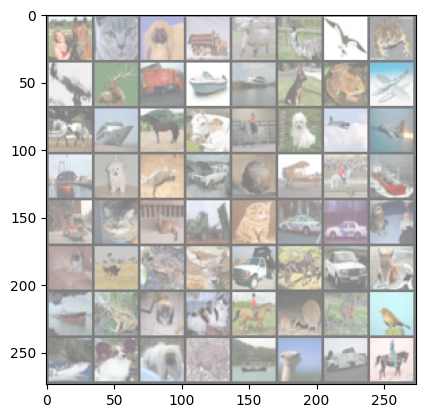

horse cat   dog   truck horse bird  bird  frog  airplane deer  truck ship  ship  dog   frog  airplane horse ship  horse horse horse dog   airplane airplane ship  dog   cat   automobile bird  airplane horse ship  truck cat   deer  truck cat   automobile automobile cat   dog   bird  frog  deer  truck horse automobile horse ship  frog  dog   cat   horse bird  deer  bird  ship  dog   dog   frog  ship  bird  truck horse


In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  numpyimg = img.numpy()
  plt.imshow(np.transpose(numpyimg, (1,2,0)))
  plt.show()

 # get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{class_names[labels[j]]:5s}' for j in range(batch)))




*   Display 20 images in a grid with class names as titles



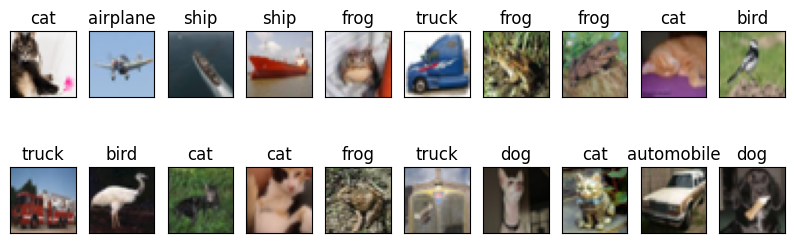

In [ ]:
# Make sure `classes` is a list of class names
classes = list(trainset.classes)

# Example: Loading images and displaying them with class names
imagesIter = iter(trainloader)
images, labels = next(imagesIter)

fig = plt.figure(figsize=(10, 5))

# Display 20 images in a grid with class names as titles
for i in np.arange(20):
   ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
   plt.imshow(images
   [i].permute(1, 2, 0))  # Convert from PyTorch tensor format to image format
   ax.set_title(classes[labels[i].item()])

plt.show()

##**5. Creating an CNN model :**

In [ ]:
  class CNN(nn.Module):
      def __init__(self):
          super(CNN, self).__init__()
          # Convolutional layers
          self.conv1 = nn.Conv2d(3,32, kernel_size=3, padding=1)
          self.conv2 = nn.Conv2d(32,64, kernel_size=3, padding=1)
          self.conv3 = nn.Conv2d(64,128, kernel_size=3, padding=1)
          self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # strid is shift with 2 position
          self.fc1 = nn.Linear(128 * 4 * 4, 256)
          self.fc2 = nn.Linear(256, 128)
          self.fc3 = nn.Linear(128,10)
          self.dropout = nn.Dropout(0.5)



      def forward(self, x):
          x = self.pool(torch.relu(self.conv1(x)))
          x = self.pool(torch.relu(self.conv2(x)))
          x = self.pool(torch.relu(self.conv3(x)))
          x = x.view(-1, 128 * 4 *4)
          x = torch.relu(self.fc1(x))
          x =  self.dropout(x)
          x = torch.relu(self.fc2(x))
          x = self.fc3(x)
          return x


In [ ]:
images, labels = images.to(device), labels.to(device)

In [ ]:
# Initialize the LeNet model
model = CNN().to(device) # run model on cuda GPU for faster results

# Forward pass
out = model(images)
print(out.shape)  # Should output (64, 10), because there are 10 classes in CIFAR-10


torch.Size([64, 10])


In [ ]:
print(device)

cpu


##**6. Train the model :**

In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
loss_func = nn.CrossEntropyLoss()

In [ ]:
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20):
    # Lists to store the loss and accuracy for each epoch
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        # Set the model to training mode
        model.train()

        # Initialize running variables for loss and accuracy
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training Loop
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()  # Accumulate loss

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)  # Average training loss
        train_accuracy = 100 * correct_train / total_train  # Training accuracy

        # Store train loss and accuracy
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the test data
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

        # Store test loss and accuracy
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Adjust learning rate using the scheduler
        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            scheduler.step(test_loss)  # For ReduceLROnPlateau, step with validation loss
        else:
            scheduler.step()  # For other schedulers like StepLR, ExponentialLR, etc.

        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%\n")

    return train_losses, train_accuracies, test_losses, test_accuracies

##**7. Evalulate the Model :**

In [ ]:
# Function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode (no gradients)
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate test accuracy
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss = test_loss / len(test_loader)  # Average test loss
    test_accuracy = 100 * correct_test / total_test  # Test accuracy

    return test_loss, test_accuracy

##**8. Define Loss Function and three differnt optimizer technique :**
        Experiment 1: SGD
        Experiment 2: Adam
        Experiment 3: RMSprop

##**Experiment 1: SGD optimizer**  


---



---



        1. SGD with StepLR Scheduler
        2. SGD with ReduceLROnPlateau
        3. SGD with ExponentialLR Scheduler








###**1. SGD with StepLR Scheduler**

In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1 = CNN()
criterion = nn.CrossEntropyLoss()
import torch.optim as optim

optimizer_sgd = torch.optim.SGD(model_experiment1.parameters(), lr=0.01)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with StepLR")

train_losses_experiment1_steplr, train_accuracies_experiment1_steplr, test_losses_experiment1_steplr, test_accuracies_experiment1_steplr = train_model(
    model_experiment1, trainloader, testloader, criterion, optimizer_sgd, scheduler_steplr, epochs=30
)

Running Experiment 1: SGD with StepLR
Epoch [1/30]
Train Loss: 2.3023, Train Accuracy: 10.81%
Test Loss: 2.3007, Test Accuracy: 10.79%

Epoch [2/30]
Train Loss: 2.2984, Train Accuracy: 13.97%
Test Loss: 2.2921, Test Accuracy: 18.50%

Epoch [3/30]
Train Loss: 2.2568, Train Accuracy: 16.91%
Test Loss: 2.1248, Test Accuracy: 23.10%

Epoch [4/30]
Train Loss: 2.0631, Train Accuracy: 23.12%
Test Loss: 2.0430, Test Accuracy: 24.79%

Epoch [5/30]
Train Loss: 1.9933, Train Accuracy: 26.12%
Test Loss: 1.9235, Test Accuracy: 29.12%

Epoch [6/30]
Train Loss: 1.9345, Train Accuracy: 29.29%
Test Loss: 1.8497, Test Accuracy: 31.38%

Epoch [7/30]
Train Loss: 1.8511, Train Accuracy: 32.73%
Test Loss: 1.7485, Test Accuracy: 36.66%

Epoch [8/30]
Train Loss: 1.7565, Train Accuracy: 36.47%
Test Loss: 1.6603, Test Accuracy: 39.90%

Epoch [9/30]
Train Loss: 1.6766, Train Accuracy: 39.39%
Test Loss: 1.5941, Test Accuracy: 42.32%

Epoch [10/30]
Train Loss: 1.6101, Train Accuracy: 41.69%
Test Loss: 1.5548, Test

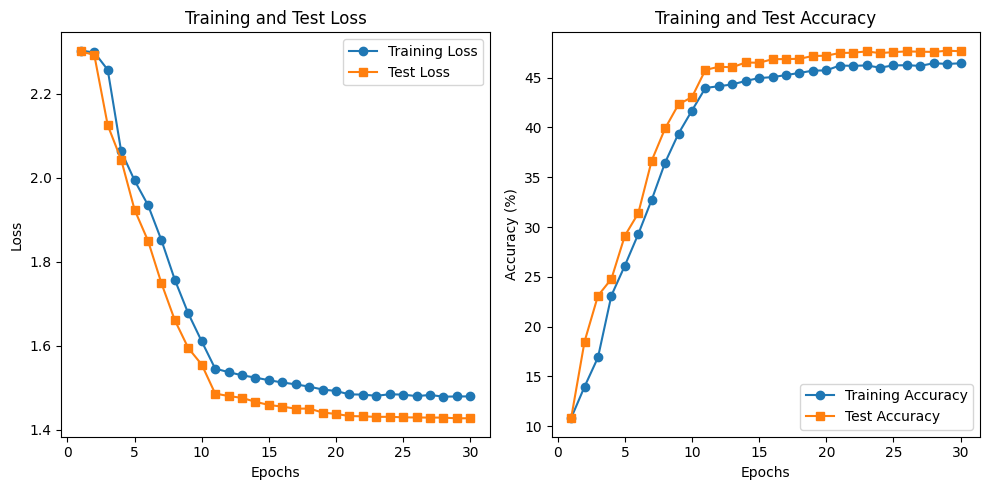

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 5 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_steplr, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment1_steplr, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_steplr, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment1_steplr, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Incorrect Prediction!
Sample 2: Incorrect Prediction!
Sample 3: Correct Prediction!
Sample 4: Correct Prediction!
Sample 5: Incorrect Prediction!
Sample 6: Correct Prediction!
Sample 7: Correct Prediction!
Sample 8: Correct Prediction!
Sample 9: Correct Prediction!
Sample 10: Incorrect Prediction!


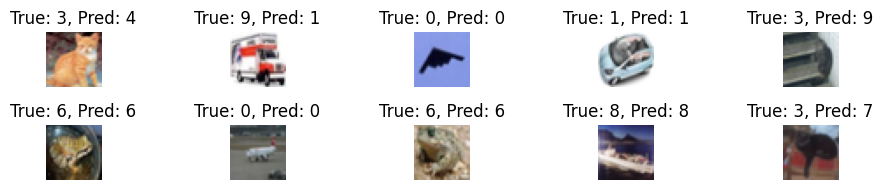

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment1, testloader, num_samples=10)


###**2. SGD with ReduceLROnPlateau**

In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1_Reduc = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_sgd = torch.optim.SGD(model_experiment1_Reduc.parameters(), lr=0.01)
scheduler_plateau_experiment1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_sgd, mode='min', factor=0.1, patience=5)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with StepLR")

train_losses_experiment1_plateau, train_accuracies_experiment1_plateau, test_losses_experiment1_plateau, test_accuracies_experiment1_plateau = train_model(
    model_experiment1_Reduc, trainloader, testloader, criterion, optimizer_sgd, scheduler_plateau_experiment1, epochs=30
)



Running Experiment 1: SGD with StepLR
Epoch [1/30]
Train Loss: 2.3024, Train Accuracy: 10.69%
Test Loss: 2.3000, Test Accuracy: 12.11%

Epoch [2/30]
Train Loss: 2.2968, Train Accuracy: 13.70%
Test Loss: 2.2878, Test Accuracy: 12.66%

Epoch [3/30]
Train Loss: 2.2465, Train Accuracy: 16.43%
Test Loss: 2.1326, Test Accuracy: 24.76%

Epoch [4/30]
Train Loss: 2.0705, Train Accuracy: 23.45%
Test Loss: 2.0121, Test Accuracy: 26.07%

Epoch [5/30]
Train Loss: 1.9884, Train Accuracy: 26.80%
Test Loss: 2.0812, Test Accuracy: 23.80%

Epoch [6/30]
Train Loss: 1.9147, Train Accuracy: 29.98%
Test Loss: 1.8601, Test Accuracy: 30.73%

Epoch [7/30]
Train Loss: 1.8105, Train Accuracy: 34.58%
Test Loss: 1.7380, Test Accuracy: 37.43%

Epoch [8/30]
Train Loss: 1.7062, Train Accuracy: 38.31%
Test Loss: 1.6152, Test Accuracy: 41.06%

Epoch [9/30]
Train Loss: 1.6310, Train Accuracy: 40.79%
Test Loss: 1.6337, Test Accuracy: 41.15%

Epoch [10/30]
Train Loss: 1.5728, Train Accuracy: 42.60%
Test Loss: 1.4779, Test

###**Visulization Results :**


---

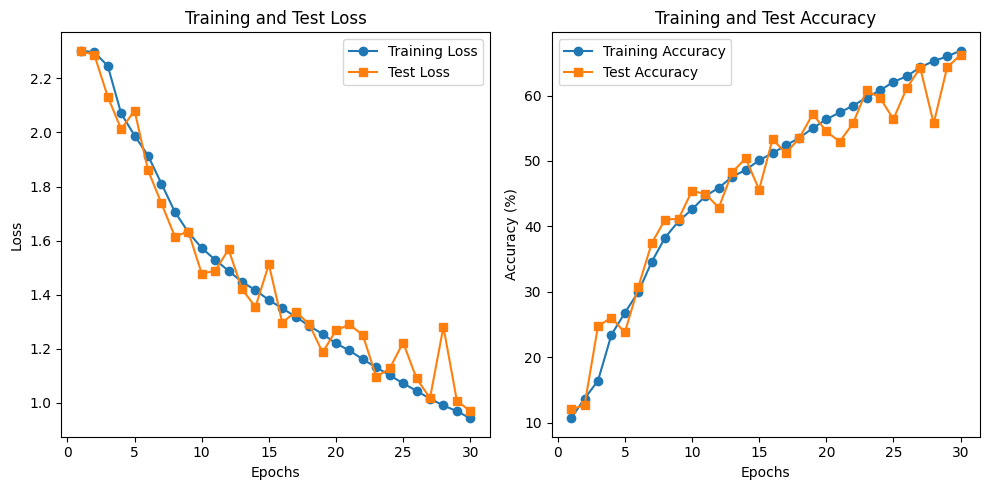

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_plateau, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment1_plateau, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_plateau, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment1_plateau, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Correct Prediction!
Sample 2: Incorrect Prediction!
Sample 3: Incorrect Prediction!
Sample 4: Correct Prediction!
Sample 5: Correct Prediction!
Sample 6: Correct Prediction!
Sample 7: Correct Prediction!
Sample 8: Incorrect Prediction!
Sample 9: Correct Prediction!
Sample 10: Correct Prediction!


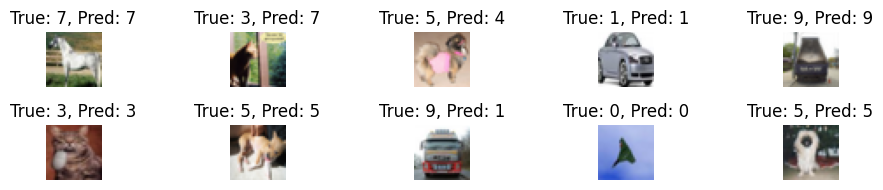

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment1_Reduc, testloader, num_samples=10)


###**3. SGD with ExponentialLR Scheduler**

In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment1 = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_sgd = torch.optim.SGD(model_experiment1.parameters(), lr=0.01)
scheduler_explr_experiment1 = optim.lr_scheduler.ExponentialLR(optimizer_sgd, gamma=0.9)

# Now call the function to train and evaluate
print("Running Experiment 1: SGD with ExponentialLR Scheduler")

train_losses_experiment1_ExponentialLR, train_accuracies_experiment1_ExponentialLR, test_losses_experiment1_ExponentialLR, test_accuracies_experiment1_ExponentialLR = train_model(
    model_experiment1, trainloader, testloader, criterion, optimizer_sgd, scheduler_explr_experiment1, epochs=30
)

Running Experiment 1: SGD with ExponentialLR Scheduler
Epoch [1/30]
Train Loss: 2.3025, Train Accuracy: 10.86%
Test Loss: 2.3008, Test Accuracy: 13.28%

Epoch [2/30]
Train Loss: 2.2997, Train Accuracy: 14.07%
Test Loss: 2.2968, Test Accuracy: 16.04%

Epoch [3/30]
Train Loss: 2.2917, Train Accuracy: 15.19%
Test Loss: 2.2775, Test Accuracy: 17.82%

Epoch [4/30]
Train Loss: 2.2273, Train Accuracy: 17.94%
Test Loss: 2.1208, Test Accuracy: 24.85%

Epoch [5/30]
Train Loss: 2.0732, Train Accuracy: 23.01%
Test Loss: 2.0697, Test Accuracy: 24.00%

Epoch [6/30]
Train Loss: 2.0110, Train Accuracy: 25.38%
Test Loss: 1.9736, Test Accuracy: 27.49%

Epoch [7/30]
Train Loss: 1.9750, Train Accuracy: 27.19%
Test Loss: 1.9245, Test Accuracy: 29.54%

Epoch [8/30]
Train Loss: 1.9410, Train Accuracy: 28.65%
Test Loss: 1.9089, Test Accuracy: 30.69%

Epoch [9/30]
Train Loss: 1.9062, Train Accuracy: 30.20%
Test Loss: 1.8526, Test Accuracy: 32.50%

Epoch [10/30]
Train Loss: 1.8692, Train Accuracy: 31.64%
Test L

###**Visulization Results :**


---

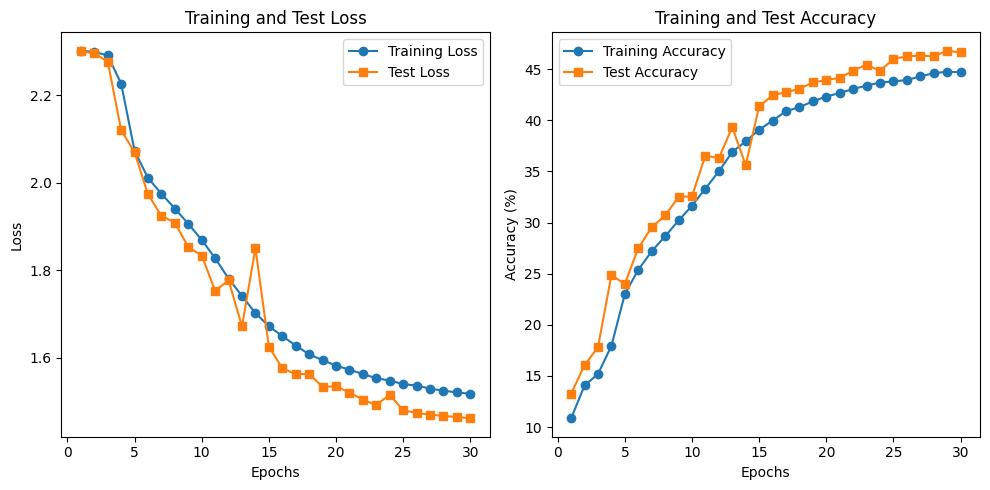

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment1_ExponentialLR, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment1_ExponentialLR, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment1_ExponentialLR, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment1_ExponentialLR, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Correct Prediction!
Sample 2: Incorrect Prediction!
Sample 3: Correct Prediction!
Sample 4: Incorrect Prediction!
Sample 5: Incorrect Prediction!
Sample 6: Incorrect Prediction!
Sample 7: Correct Prediction!
Sample 8: Correct Prediction!
Sample 9: Correct Prediction!
Sample 10: Incorrect Prediction!


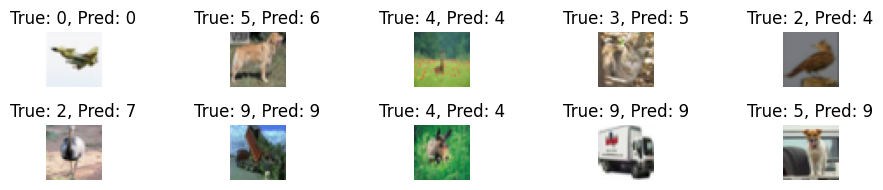

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment1, testloader, num_samples=10)


#**Experient 2 : Adam Optimizer**


        1. Adam with StepLR Scheduler
        2. Adam with ReduceLTROnPlateau scheduler_steplr
        3. Adam with ExponentialLR Scheduler



###**1. Adam with StepLR Scheduler**


---


In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2 = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2.parameters(), lr=0.01)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_adam, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 2: Adam with StepLR")

train_losses_experiment2_steplr, train_accuracies_experiment2_steplr, test_losses_experiment2_steplr, test_accuracies_experiment2_steplr = train_model(
    model_experiment2, trainloader, testloader, criterion, optimizer_adam, scheduler_steplr, epochs=30)


Running Experiment 2: Adam with StepLR
Epoch [1/30]
Train Loss: 2.3078, Train Accuracy: 10.04%
Test Loss: 2.3033, Test Accuracy: 10.00%

Epoch [2/30]
Train Loss: 2.3036, Train Accuracy: 10.07%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [3/30]
Train Loss: 2.3036, Train Accuracy: 9.95%
Test Loss: 2.3036, Test Accuracy: 10.00%

Epoch [4/30]
Train Loss: 2.3036, Train Accuracy: 9.84%
Test Loss: 2.3038, Test Accuracy: 10.00%

Epoch [5/30]
Train Loss: 2.3034, Train Accuracy: 9.98%
Test Loss: 2.3031, Test Accuracy: 10.00%

Epoch [6/30]
Train Loss: 2.3036, Train Accuracy: 9.82%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [7/30]
Train Loss: 2.3036, Train Accuracy: 9.95%
Test Loss: 2.3037, Test Accuracy: 10.00%

Epoch [8/30]
Train Loss: 2.3037, Train Accuracy: 9.75%
Test Loss: 2.3031, Test Accuracy: 10.00%

Epoch [9/30]
Train Loss: 2.3034, Train Accuracy: 10.09%
Test Loss: 2.3037, Test Accuracy: 10.00%

Epoch [10/30]
Train Loss: 2.3037, Train Accuracy: 9.94%
Test Loss: 2.3030, Test Accur

##**Visulization Results:**

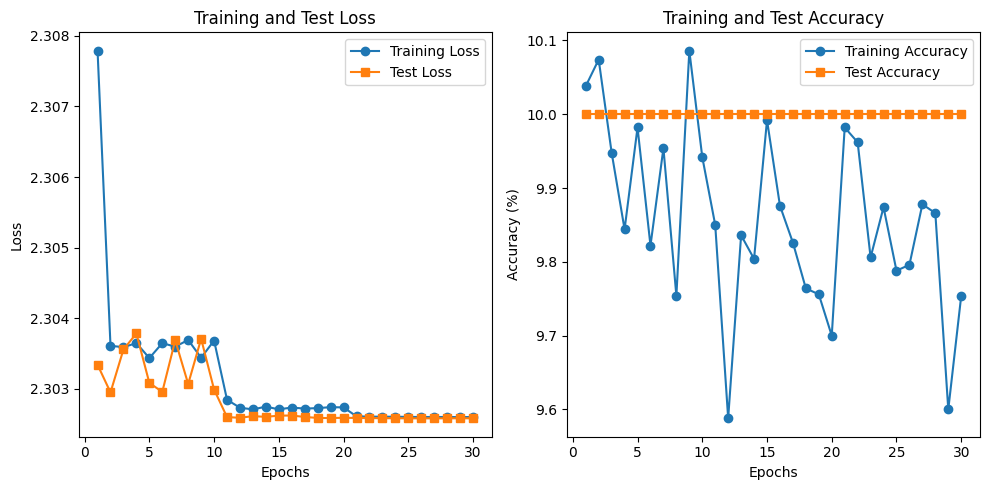

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment2_steplr, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment2_steplr, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_steplr, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment2_steplr, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Incorrect Prediction!
Sample 2: Correct Prediction!
Sample 3: Correct Prediction!
Sample 4: Correct Prediction!
Sample 5: Correct Prediction!
Sample 6: Incorrect Prediction!
Sample 7: Incorrect Prediction!
Sample 8: Incorrect Prediction!
Sample 9: Incorrect Prediction!
Sample 10: Correct Prediction!


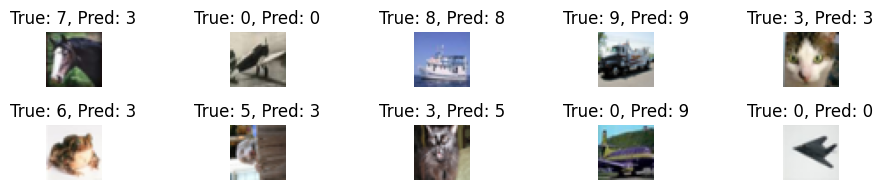

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment1, testloader, num_samples=10)


###**2. Adam with ReduceLTROnPlateau scheduler_steplr**


---


In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2_Reduce = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2_Reduce.parameters(), lr=0.01)

# Now call the function to train and evaluate
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer_adam, mode='min', factor=0.1, patience=5)


print("Running Experiment 2: Adam with ReduceLROnPlateau")
train_losses_experiment2_plateau , train_accuracies_experiment2_plateau , test_losses_experiment2_plateau, test_accuracies_experiment2_plateau  = train_model(
    model_experiment2_Reduce, trainloader, testloader, criterion, optimizer_adam, scheduler_plateau, epochs=30)


Running Experiment 2: Adam with ReduceLROnPlateau
Epoch [1/30]
Train Loss: 2.3107, Train Accuracy: 10.29%
Test Loss: 2.3035, Test Accuracy: 10.00%

Epoch [2/30]
Train Loss: 2.3034, Train Accuracy: 10.15%
Test Loss: 2.3038, Test Accuracy: 10.00%

Epoch [3/30]
Train Loss: 2.3036, Train Accuracy: 9.92%
Test Loss: 2.3035, Test Accuracy: 10.00%

Epoch [4/30]
Train Loss: 2.3038, Train Accuracy: 9.73%
Test Loss: 2.3032, Test Accuracy: 10.00%

Epoch [5/30]
Train Loss: 2.3037, Train Accuracy: 9.95%
Test Loss: 2.3047, Test Accuracy: 10.00%

Epoch [6/30]
Train Loss: 2.3037, Train Accuracy: 9.91%
Test Loss: 2.3036, Test Accuracy: 10.00%

Epoch [7/30]
Train Loss: 2.3037, Train Accuracy: 10.01%
Test Loss: 2.3031, Test Accuracy: 10.00%

Epoch [8/30]
Train Loss: 2.3034, Train Accuracy: 10.18%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [9/30]
Train Loss: 2.3036, Train Accuracy: 10.03%
Test Loss: 2.3029, Test Accuracy: 10.00%

Epoch [10/30]
Train Loss: 2.3036, Train Accuracy: 10.06%
Test Loss: 2.30

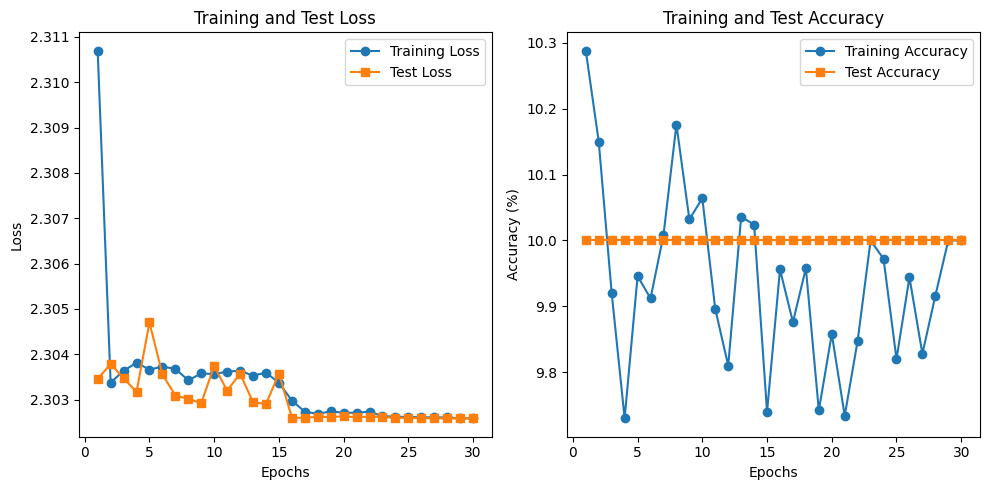

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment2_plateau, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment2_plateau, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_plateau, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment2_plateau, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Incorrect Prediction!
Sample 2: Incorrect Prediction!
Sample 3: Incorrect Prediction!
Sample 4: Incorrect Prediction!
Sample 5: Incorrect Prediction!
Sample 6: Incorrect Prediction!
Sample 7: Incorrect Prediction!
Sample 8: Incorrect Prediction!
Sample 9: Incorrect Prediction!
Sample 10: Incorrect Prediction!


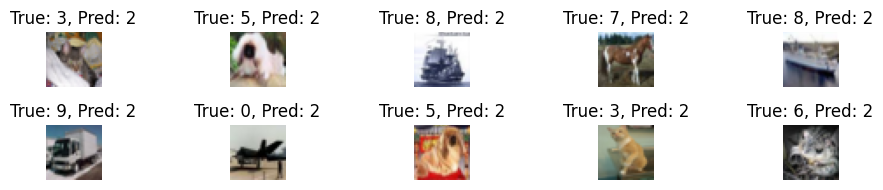

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment2_Reduce, testloader, num_samples=10)


###**3. Adam with ExponentialLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment2_Ex = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_adam = torch.optim.Adam(model_experiment2_Ex.parameters(), lr=0.01)
scheduler_explr = optim.lr_scheduler.ExponentialLR(optimizer_adam, gamma=0.9)


print("Running Experiment 2: Adam with ExponentialLR Scheduler")
train_losses_experiment2_explr, train_accuracies_experiment2_explr, test_losses_experiment2_explr, test_accuracies_experiment2_explr = train_model(
    model_experiment2_Ex, trainloader, testloader, criterion, optimizer_adam, scheduler_explr, epochs=30)


Running Experiment 2: Adam with ExponentialLR Scheduler
Epoch [1/30]
Train Loss: 2.3051, Train Accuracy: 9.87%
Test Loss: 2.3034, Test Accuracy: 10.00%

Epoch [2/30]
Train Loss: 2.3035, Train Accuracy: 9.84%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [3/30]
Train Loss: 2.3035, Train Accuracy: 9.88%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [4/30]
Train Loss: 2.3033, Train Accuracy: 10.14%
Test Loss: 2.3030, Test Accuracy: 10.00%

Epoch [5/30]
Train Loss: 2.3033, Train Accuracy: 9.71%
Test Loss: 2.3035, Test Accuracy: 10.00%

Epoch [6/30]
Train Loss: 2.3032, Train Accuracy: 10.10%
Test Loss: 2.3028, Test Accuracy: 10.00%

Epoch [7/30]
Train Loss: 2.3031, Train Accuracy: 9.96%
Test Loss: 2.3032, Test Accuracy: 10.00%

Epoch [8/30]
Train Loss: 2.3030, Train Accuracy: 10.13%
Test Loss: 2.3033, Test Accuracy: 10.00%

Epoch [9/30]
Train Loss: 2.3032, Train Accuracy: 9.98%
Test Loss: 2.3027, Test Accuracy: 10.00%

Epoch [10/30]
Train Loss: 2.3031, Train Accuracy: 9.92%
Test Loss: 2

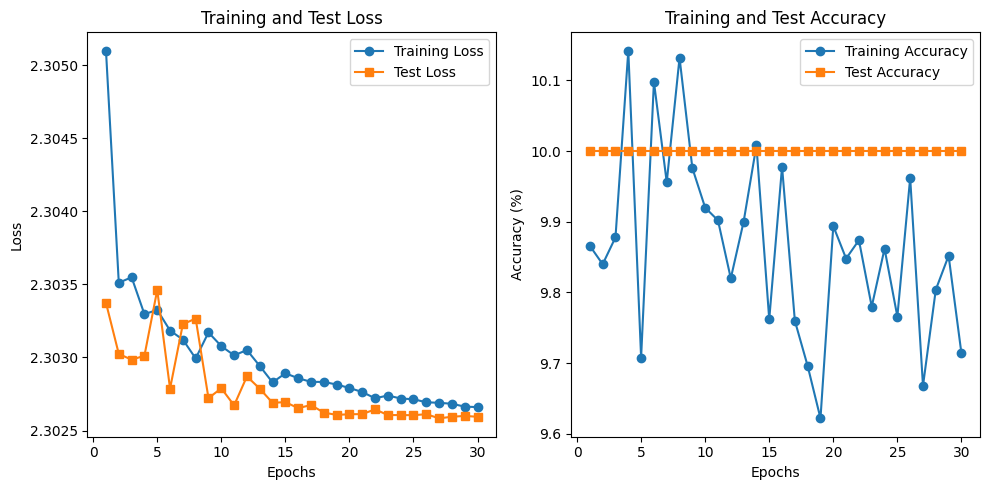

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment2_explr, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment2_explr, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment2_explr, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment2_explr, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Incorrect Prediction!
Sample 2: Incorrect Prediction!
Sample 3: Incorrect Prediction!
Sample 4: Incorrect Prediction!
Sample 5: Incorrect Prediction!
Sample 6: Incorrect Prediction!
Sample 7: Incorrect Prediction!
Sample 8: Incorrect Prediction!
Sample 9: Incorrect Prediction!
Sample 10: Incorrect Prediction!


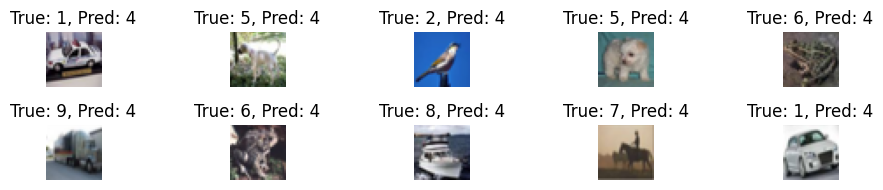

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment2_Ex, testloader, num_samples=10)


##**Experiment 3 : RMSprop**

---



---
        1. RMSprop with StepLR Scheduler
        2. RMSprop with ReduceLTROnPlateau scheduler_steplr
        3. RMSprop with ExponentialLR Scheduler

###**1. RMSprop with StepLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3 = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3.parameters(), lr=0.001)
scheduler_steplr = optim.lr_scheduler.StepLR(optimizer_rmsprop, step_size=10, gamma=0.1)

# Now call the function to train and evaluate
print("Running Experiment 3: RMSprop with StepLR")


train_losses_experiment3_steplr, train_accuracies_experiment3_steplr, test_losses_experiment3_steplr, test_accuracies_experiment3_steplr = train_model(
    model_experiment3, trainloader, testloader, criterion, optimizer_rmsprop, scheduler_steplr, epochs=30
)

Running Experiment 3: RMSprop with StepLR
Epoch [1/30]
Train Loss: 1.7179, Train Accuracy: 36.27%
Test Loss: 1.4695, Test Accuracy: 45.81%

Epoch [2/30]
Train Loss: 1.3272, Train Accuracy: 51.71%
Test Loss: 1.1897, Test Accuracy: 57.05%

Epoch [3/30]
Train Loss: 1.1358, Train Accuracy: 59.50%
Test Loss: 1.3746, Test Accuracy: 52.24%

Epoch [4/30]
Train Loss: 1.0067, Train Accuracy: 64.27%
Test Loss: 1.0320, Test Accuracy: 63.47%

Epoch [5/30]
Train Loss: 0.9088, Train Accuracy: 67.91%
Test Loss: 1.0540, Test Accuracy: 63.86%

Epoch [6/30]
Train Loss: 0.8282, Train Accuracy: 70.76%
Test Loss: 1.0467, Test Accuracy: 64.74%

Epoch [7/30]
Train Loss: 0.7701, Train Accuracy: 73.04%
Test Loss: 0.9200, Test Accuracy: 67.65%

Epoch [8/30]
Train Loss: 0.7128, Train Accuracy: 75.02%
Test Loss: 0.8216, Test Accuracy: 71.68%

Epoch [9/30]
Train Loss: 0.6614, Train Accuracy: 76.99%
Test Loss: 0.8286, Test Accuracy: 71.45%

Epoch [10/30]
Train Loss: 0.6225, Train Accuracy: 78.05%
Test Loss: 0.8342, 

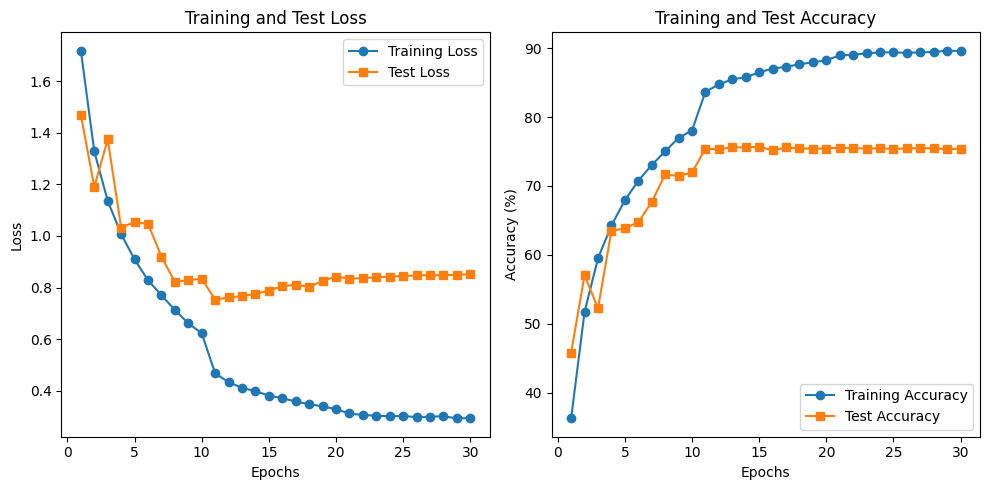

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment3_steplr, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment3_steplr, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3_steplr, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment3_steplr, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


###**2. RMSprop with ReduceLTROnPlateau scheduler_steplr**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3_Reduc = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3_Reduc.parameters(), lr=0.001)
scheduler_plateau = optim.lr_scheduler.ReduceLROnPlateau(optimizer_rmsprop, mode='min', factor=0.1, patience=5)


print("Running Experiment 3: RMDprop with ReduceLROnPlateau")


train_losses_experiment3_plateau, train_accuracies_experiment3_plateau, test_losses_experiment3_plateau, test_accuracies_experiment3_plateau = train_model(
    model_experiment3_Reduc, trainloader, testloader, criterion, optimizer_rmsprop, scheduler_plateau, epochs=30
)

Running Experiment 3: RMDprop with ReduceLROnPlateau
Epoch [1/30]
Train Loss: 1.7354, Train Accuracy: 36.42%
Test Loss: 1.5659, Test Accuracy: 44.23%

Epoch [2/30]
Train Loss: 1.2956, Train Accuracy: 53.25%
Test Loss: 1.1737, Test Accuracy: 57.52%

Epoch [3/30]
Train Loss: 1.0885, Train Accuracy: 61.20%
Test Loss: 1.0483, Test Accuracy: 62.83%

Epoch [4/30]
Train Loss: 0.9496, Train Accuracy: 66.27%
Test Loss: 0.9779, Test Accuracy: 65.59%

Epoch [5/30]
Train Loss: 0.8632, Train Accuracy: 69.75%
Test Loss: 1.0016, Test Accuracy: 65.99%

Epoch [6/30]
Train Loss: 0.7858, Train Accuracy: 72.49%
Test Loss: 0.8773, Test Accuracy: 69.23%

Epoch [7/30]
Train Loss: 0.7283, Train Accuracy: 74.74%
Test Loss: 1.0190, Test Accuracy: 65.70%

Epoch [8/30]
Train Loss: 0.6730, Train Accuracy: 76.43%
Test Loss: 1.3471, Test Accuracy: 56.55%

Epoch [9/30]
Train Loss: 0.6276, Train Accuracy: 77.93%
Test Loss: 0.8894, Test Accuracy: 70.06%

Epoch [10/30]
Train Loss: 0.5930, Train Accuracy: 79.11%
Test Los

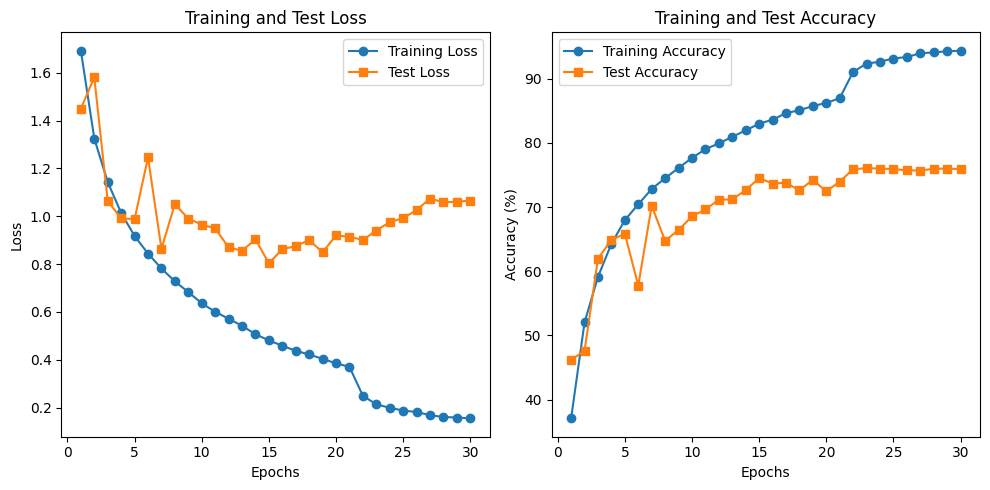

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment3_plateau, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment3_plateau, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3_plateau, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment3_plateau, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Correct Prediction!
Sample 2: Correct Prediction!
Sample 3: Correct Prediction!
Sample 4: Correct Prediction!
Sample 5: Correct Prediction!
Sample 6: Correct Prediction!
Sample 7: Correct Prediction!
Sample 8: Correct Prediction!
Sample 9: Correct Prediction!
Sample 10: Correct Prediction!


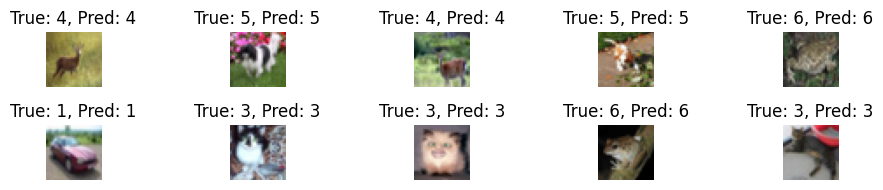

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment3_Reduc, testloader, num_samples=10)


###**3. RMSprop with ExponentialLR Scheduler**


---



In [ ]:
# Specify loss function and reinitializes the model for each experient with fresh random weights.
model_experiment3_Ex = CNN()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model_experiment3_Ex.parameters(), lr=0.001)
scheduler_explr = optim.lr_scheduler.ExponentialLR(optimizer_rmsprop, gamma=0.9)
print("Running Experient 3: RMSprop with ExponentialLR")


train_losses_experiment3_Ex, train_accuracies_experiment3_Ex, test_losses_experiment3_Ex, test_accuracies_experiment3_Ex = train_model(
    model_experiment3_Ex, trainloader, testloader, criterion, optimizer_rmsprop, scheduler_explr, epochs=30
)

Running Experient 3: RMSprop with ExponentialLR
Epoch [1/30]
Train Loss: 1.7529, Train Accuracy: 34.70%
Test Loss: 1.5467, Test Accuracy: 44.81%

Epoch [2/30]
Train Loss: 1.3203, Train Accuracy: 51.82%
Test Loss: 1.3851, Test Accuracy: 50.39%

Epoch [3/30]
Train Loss: 1.1199, Train Accuracy: 60.08%
Test Loss: 1.0562, Test Accuracy: 62.39%

Epoch [4/30]
Train Loss: 0.9809, Train Accuracy: 65.35%
Test Loss: 1.2892, Test Accuracy: 56.72%

Epoch [5/30]
Train Loss: 0.8812, Train Accuracy: 68.87%
Test Loss: 0.8628, Test Accuracy: 69.80%

Epoch [6/30]
Train Loss: 0.8039, Train Accuracy: 71.92%
Test Loss: 0.8231, Test Accuracy: 71.26%

Epoch [7/30]
Train Loss: 0.7364, Train Accuracy: 74.20%
Test Loss: 0.8546, Test Accuracy: 70.56%

Epoch [8/30]
Train Loss: 0.6750, Train Accuracy: 76.44%
Test Loss: 0.7743, Test Accuracy: 73.95%

Epoch [9/30]
Train Loss: 0.6300, Train Accuracy: 77.84%
Test Loss: 0.7463, Test Accuracy: 74.41%

Epoch [10/30]
Train Loss: 0.5818, Train Accuracy: 79.56%
Test Loss: 0.

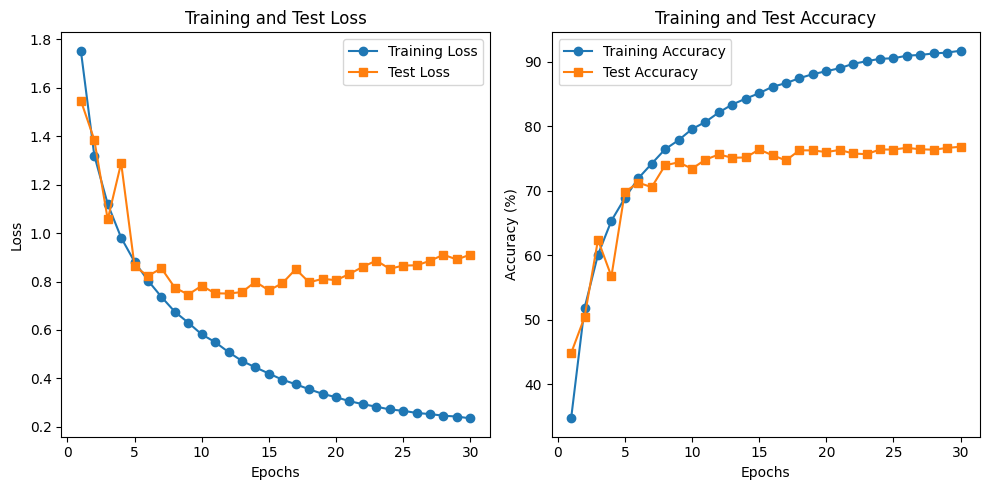

In [ ]:
import matplotlib.pyplot as plt

# Assuming the losses and accuracies are already collected
epochs = range(1, 31)  # For 30 epochs

# Plot the losses and accuracies
plt.figure(figsize=(10, 5))

# Plotting training and testing loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses_experiment3_Ex, label='Training Loss', marker='o')
plt.plot(epochs, test_losses_experiment3_Ex, label='Test Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plotting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies_experiment3_Ex, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies_experiment3_Ex, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Function to get predictions from the model after training:**

Sample 1: Correct Prediction!
Sample 2: Correct Prediction!
Sample 3: Correct Prediction!
Sample 4: Correct Prediction!
Sample 5: Correct Prediction!
Sample 6: Incorrect Prediction!
Sample 7: Correct Prediction!
Sample 8: Incorrect Prediction!
Sample 9: Correct Prediction!
Sample 10: Correct Prediction!


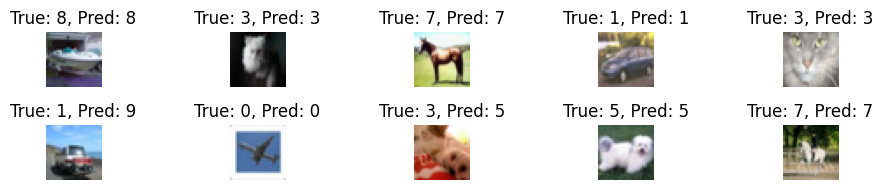

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def random_validation(model, test_loader, num_samples=10):
    # Set the model to evaluation mode
    model.eval()

    # Randomly select 10 sample indices from the test set
    random_indices = np.random.randint(0, len(test_loader.dataset), num_samples)

    plt.figure(figsize=(10, 2))  # Create a larger figure for displaying 10 images

    for i, random_idx in enumerate(random_indices):
        # Get the image and the true label at the random index
        image, true_label = test_loader.dataset[random_idx]

        # Add batch dimension (1, 3, 32, 32)
        image = image.unsqueeze(0)

        # Get the model's prediction
        with torch.no_grad():  # Disable gradient calculation for inference
            output = model(image)
            _, predicted_label = torch.max(output, 1)  # Get the predicted label

        # Convert the image back to CPU and remove batch dimension for plotting
        image = image.squeeze(0).cpu()

        # Display the image and prediction
        plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for 10 images
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Rearrange dimensions for plotting
        plt.title(f"True: {true_label}, Pred: {predicted_label.item()}")
        plt.axis("off")

        # Print whether the prediction is correct or incorrect
        if predicted_label.item() == true_label:
            print(f"Sample {i+1}: Correct Prediction!")
        else:
            print(f"Sample {i+1}: Incorrect Prediction!")

    plt.tight_layout()
    plt.show()

# Run the random validation function with 10 random samples
random_validation(model_experiment3_Ex, testloader, num_samples=10)


##**9. Comaparion the results**

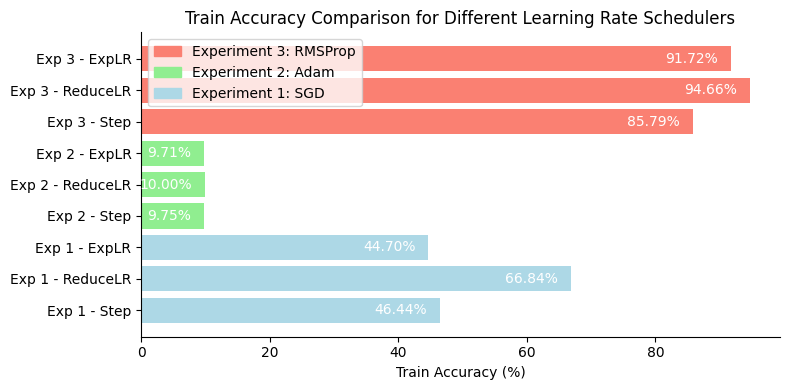

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for train accuracy in each experiment
experiments = ['StepLR', 'ReduceLROnPlateau', 'ExponentialLR']
exp1_train_accuracies = [46.44, 66.84, 44.70]  # Experiment 1 train accuracies
exp2_train_accuracies = [9.75, 10.00, 9.71]  # Experiment 2 train accuracies
exp3_train_accuracies = [85.79, 94.66, 91.72]  # Experiment 3 train accuracies

# Combine data to align with grouped style
data = [
    ("Exp 1 - Step", exp1_train_accuracies[0]),
    ("Exp 1 - ReduceLR", exp1_train_accuracies[1]),
    ("Exp 1 - ExpLR", exp1_train_accuracies[2]),
    ("Exp 2 - Step", exp2_train_accuracies[0]),
    ("Exp 2 - ReduceLR", exp2_train_accuracies[1]),
    ("Exp 2 - ExpLR", exp2_train_accuracies[2]),
    ("Exp 3 - Step", exp3_train_accuracies[0]),
    ("Exp 3 - ReduceLR", exp3_train_accuracies[1]),
    ("Exp 3 - ExpLR", exp3_train_accuracies[2])
]

# Create labels and corresponding train accuracy values
labels, train_accuracy_values = zip(*data)

# Colors for each experiment
colors = ['lightblue'] * 3 + ['lightgreen'] * 3 + ['salmon'] * 3

# Create horizontal bar chart
plt.figure(figsize=(8, 4))
bars = plt.barh(labels, train_accuracy_values, color=colors)

# Add title and labels
plt.xlabel('Train Accuracy (%)')
plt.title('Train Accuracy Comparison for Different Learning Rate Schedulers')

# Remove the chart frame (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add percentage labels inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width - 2,  # Adjusting text position inside the bar
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}%',
             va='center',
             ha='right',
             color='white')

# Add legend for the different optimizers
legend_labels = [ 'Experiment 3: RMSProp', 'Experiment 2: Adam','Experiment 1: SGD']
colors_legend = ['salmon','lightgreen',  'lightblue']
patches = [plt.Rectangle((0,0),1,1, color=color) for color in colors_legend]
plt.legend(patches, legend_labels, loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


# **Final Graphs Showing the Comparison**

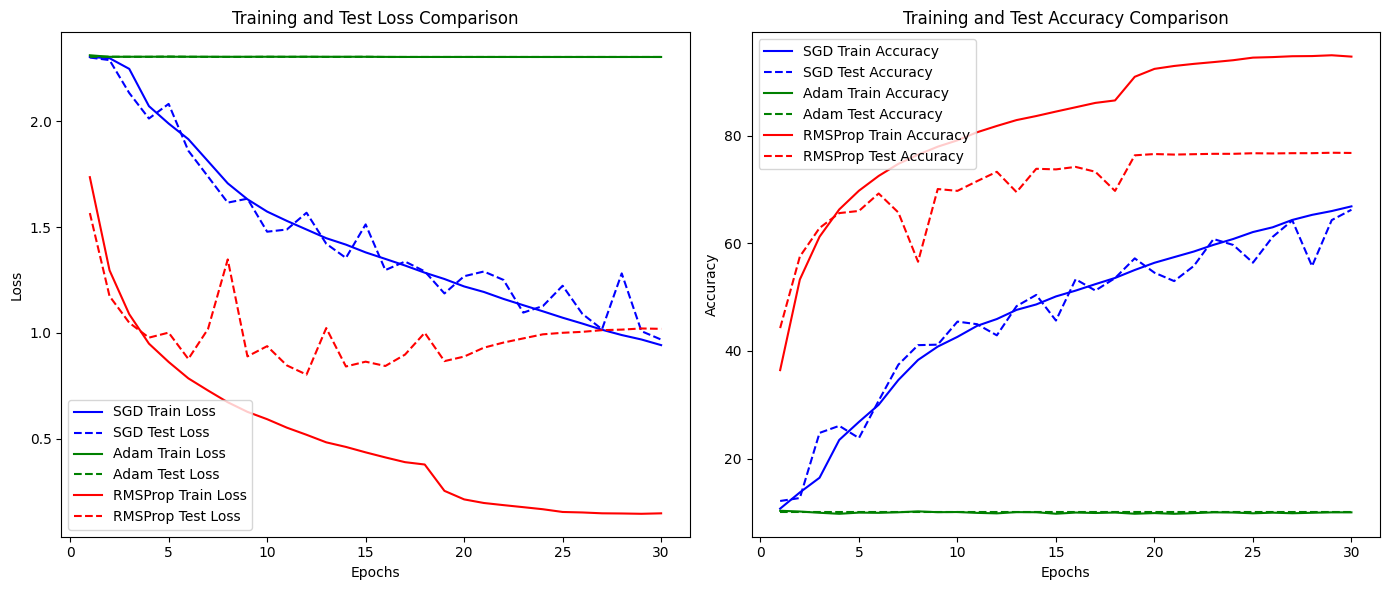

In [ ]:
# Number of epochs
import matplotlib.pyplot as plt

# Number of epochs
epochs = list(range(1, 31))  # 30 epochs

# Training and Test Loss for each optimizer
sgd_train_loss = [2.3024, 2.2968, 2.2465, 2.0705, 1.9884, 1.9147, 1.8105, 1.7062, 1.6310, 1.5728, 1.5290, 1.4882, 1.4473, 1.4169, 1.3803, 1.3495, 1.3183, 1.2845, 1.2547, 1.2196, 1.1936, 1.1606, 1.1311, 1.1021, 1.0720, 1.0444, 1.0152, 0.9902, 0.9692, 0.9426]
sgd_test_loss = [2.3000, 2.2878, 2.1326, 2.0121, 2.0812, 1.8601, 1.7380, 1.6152, 1.6337, 1.4779, 1.4883, 1.5674, 1.4211, 1.3542, 1.5124, 1.2968, 1.3371, 1.2907, 1.1866, 1.2678, 1.2900, 1.2503, 1.0961, 1.1271, 1.2229, 1.0902, 1.0174, 1.2811, 1.0085, 0.9688]
adam_train_loss = [2.3107, 2.3034, 2.3036, 2.3038, 2.3037, 2.3037, 2.3037, 2.3034, 2.3036, 2.3036, 2.3036, 2.3036, 2.3035, 2.3036, 2.3034, 2.3030, 2.3027, 2.3027, 2.3027, 2.3027, 2.3027, 2.3027, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026]
adam_test_loss = [2.3035, 2.3038, 2.3035, 2.3032, 2.3047, 2.3036, 2.3031, 2.3030, 2.3029, 2.3037, 2.3032, 2.3036, 2.3029, 2.3029, 2.3036, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026, 2.3026]
rmsprop_train_loss = [1.7354, 1.2956, 1.0885, 0.9496, 0.8632, 0.7858, 0.7283, 0.6730, 0.6276, 0.5930, 0.5531, 0.5194, 0.4838, 0.4621, 0.4365, 0.4126, 0.3902, 0.3791, 0.2548, 0.2145, 0.1975, 0.1874, 0.1778, 0.1680, 0.1551, 0.1528, 0.1488, 0.1480, 0.1465, 0.1487]
rmsprop_test_loss = [1.5659, 1.1737, 1.0483, 0.9779, 1.0016, 0.8773, 1.0190, 1.3471, 0.8894, 0.9377, 0.8469, 0.8035, 1.0231, 0.8418, 0.8645, 0.8441, 0.8979, 1.0007, 0.8671, 0.8885, 0.9305, 0.9547, 0.9743, 0.9936, 1.0008, 1.0053, 1.0132, 1.0158, 1.0212, 1.0194]

# Training and Test Accuracy for each optimizer
sgd_train_acc = [10.69, 13.70, 16.43, 23.45, 26.80, 29.98, 34.58, 38.31, 40.79, 42.60, 44.65, 45.91, 47.61, 48.62, 50.11, 51.19, 52.39, 53.54, 55.02, 56.36, 57.41, 58.45, 59.69, 60.78, 62.07, 62.95, 64.32, 65.26, 65.97, 66.84]
sgd_test_acc = [12.11, 12.66, 24.76, 26.07, 23.80, 30.73, 37.43, 41.06, 41.15, 45.43, 44.95, 42.88, 48.30, 50.39, 45.63, 53.30, 51.20, 53.51, 57.18, 54.52, 52.96, 55.77, 60.77, 59.67, 56.38, 61.17, 64.23, 55.73, 64.29, 66.21]
adam_train_acc = [10.29, 10.15, 9.92, 9.73, 9.95, 9.91, 10.01, 10.18, 10.03, 10.06, 9.90, 9.81, 10.04, 10.02, 9.74, 9.96, 9.88, 9.96, 9.74, 9.86, 9.73, 9.85, 10.00, 9.97, 9.82, 9.94, 9.83, 9.92, 10.00, 10.00]
adam_test_acc = [10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00]
rmsprop_train_acc = [36.42, 53.25, 61.20, 66.27, 69.75, 72.49, 74.74, 76.43, 77.93, 79.11, 80.61, 81.78, 82.87, 83.62, 84.45, 85.25, 86.06, 86.52, 90.91, 92.38, 92.92, 93.31, 93.64, 93.99, 94.47, 94.57, 94.73, 94.76, 94.91, 94.66]
rmsprop_test_acc = [44.23, 57.52, 62.83, 65.59, 65.99, 69.23, 65.70, 56.55, 70.06, 69.72, 71.53, 73.26, 69.49, 73.82, 73.71, 74.17,73.27, 69.71, 76.32, 76.56, 76.46, 76.53, 76.60, 76.60, 76.71, 76.67, 76.72, 76.72, 76.80, 76.76]



# Plotting Loss for all optimizers
plt.figure(figsize=(14, 6))

# Subplot 1 - Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, sgd_train_loss, label='SGD Train Loss', color='blue')
plt.plot(epochs, sgd_test_loss, label='SGD Test Loss', color='blue', linestyle='dashed')
plt.plot(epochs, adam_train_loss, label='Adam Train Loss', color='green')
plt.plot(epochs, adam_test_loss, label='Adam Test Loss', color='green', linestyle='dashed')
plt.plot(epochs, rmsprop_train_loss, label='RMSProp Train Loss', color='red')
plt.plot(epochs, rmsprop_test_loss, label='RMSProp Test Loss', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Comparison')
plt.legend()

# Subplot 2 - Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, sgd_train_acc, label='SGD Train Accuracy', color='blue')
plt.plot(epochs, sgd_test_acc, label='SGD Test Accuracy', color='blue', linestyle='dashed')
plt.plot(epochs, adam_train_acc, label='Adam Train Accuracy', color='green')
plt.plot(epochs, adam_test_acc, label='Adam Test Accuracy', color='green', linestyle='dashed')
plt.plot(epochs, rmsprop_train_acc, label='RMSProp Train Accuracy', color='red')
plt.plot(epochs, rmsprop_test_acc, label='RMSProp Test Accuracy', color='red', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Comparison')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
